<a href="https://colab.research.google.com/github/dpratap17/DeepLearningLab/blob/main/DL_Lab_EXP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell imports the essential libraries required for building, training, and evaluating a Convolutional Neural Network.

TensorFlow / Keras is used to design and train deep learning models.

NumPy is used for numerical operations and array manipulation.

Matplotlib is used to visualize training performance such as accuracy and loss.

These libraries together form the standard ecosystem for deep learning experiments.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


The CIFAR-10 dataset is a widely used benchmark dataset for image classification. It consists of 60,000 color images of size 32×32 pixels, belonging to 10 different object categories.

In this experiment, the dataset is loaded using TensorFlow’s built-in dataset loader, which automatically downloads and prepares the data in the form of training and testing sets.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Although CIFAR-10 contains 10 classes, this experiment focuses on binary classification.

Cat images (label = 3)

Dog images (label = 5)

All other class samples are removed from the dataset. This step converts a multi-class problem into a binary classification problem, simplifying the learning task and making it suitable for sigmoid activation and binary cross-entropy loss.

In [3]:
# Convert labels to 1D
y_train = y_train.flatten()
y_test = y_test.flatten()

# Select cat and dog images
train_filter = np.where((y_train == 3) | (y_train == 5))
test_filter = np.where((y_test == 3) | (y_test == 5))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]


For binary classification, labels must be represented in binary format:

Cat → 0

Dog → 1

This encoding enables the model to learn a probability score between 0 and 1, representing the likelihood of the input image belonging to the “Dog” class.

In [4]:
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)


Pixel values in images range from 0 to 255. Feeding raw values into a neural network can slow down learning and cause instability.

Normalization rescales pixel values to the range [0, 1] by dividing by 255.
This improves:

Gradient stability

Convergence speed

Overall model performance

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


The first convolutional layer applies 32 filters of size 3×3 to the input image.

Learns low-level features such as edges and corners

Preserves spatial structure of the image

ReLU activation introduces non-linearity

This layer forms the foundation for hierarchical feature learning.

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


During compilation:

Adam optimizer adapts learning rates automatically for faster convergence

Binary cross-entropy loss measures the error between predicted and actual binary labels

Accuracy is used as the evaluation metric

This step configures how the model learns from data.

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


The model is trained for 10 epochs, meaning the entire training dataset is passed through the network 10 times.

During training:

Weights are updated using backpropagation

Training accuracy improves as the model learns patterns

Validation accuracy indicates generalization ability

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.5446 - loss: 0.6850 - val_accuracy: 0.6195 - val_loss: 0.6474
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6561 - loss: 0.6205 - val_accuracy: 0.6810 - val_loss: 0.5864
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.7191 - loss: 0.5504 - val_accuracy: 0.6730 - val_loss: 0.6111
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.7480 - loss: 0.5086 - val_accuracy: 0.7335 - val_loss: 0.5335
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.7891 - loss: 0.4538 - val_accuracy: 0.7575 - val_loss: 0.5061
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8254 - loss: 0.3980 - val_accuracy: 0.7355 - val_loss: 0.5428
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8433 - loss: 0.3561 - val_accuracy: 0.7405 - val_loss: 0.5799
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8718 - loss: 0.2943 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7601 - loss: 0.6166
Test Accuracy: 0.7524999976158142


The trained model is evaluated on unseen test data.

Training accuracy (~91%) indicates strong learning

Lower test accuracy (~75%) suggests mild overfitting

This gap highlights the need for regularization and data augmentation.

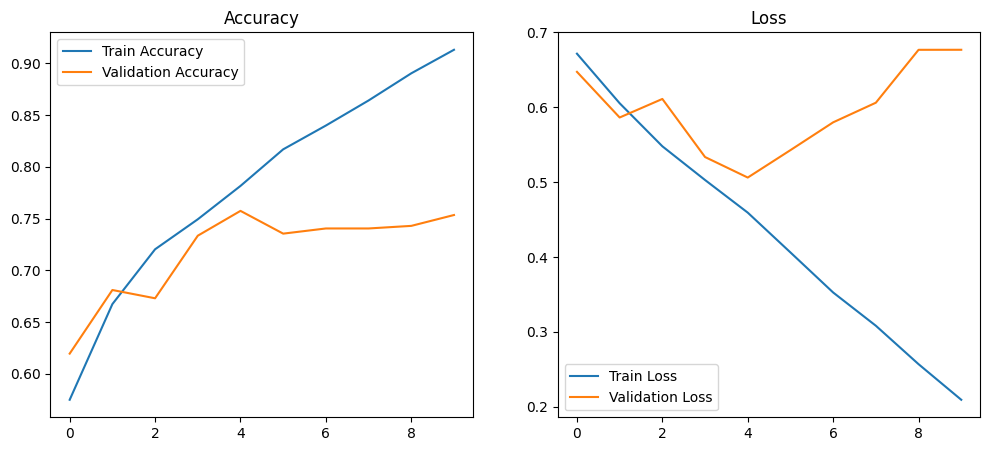

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
